In [1]:
from synet.networks import HomogeneousNetwork
from synet.networks import merge_networks
from synet.networks import HeterogeneousNetwork
from synet.networks.random import random_network
from synet.measures import overlap_parameter, agent_entropy, mixing_entropy, path_entropy, paint_entropy
from synet.process.delay import DelayProcess
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
from scipy.stats import spearmanr


In [2]:
measures = {
    "overlap": overlap_parameter,
    "agent": agent_entropy,
    "mixing": mixing_entropy,
    "path": path_entropy,
    "paint": paint_entropy,
}

n_networks = 100
n_process_sample = 100
delay_process = DelayProcess()

In [3]:
all_delay_results = []
all_measure_results = defaultdict(lambda: [])
for _ in range(n_networks):
    net = random_network()
    for i in range(n_process_sample):
        res = delay_process.simulate(net)
        if i == 0:
            delay_result = res
        else:
            delay_result += res
    all_delay_results.append(delay_result/n_process_sample)

    for name, measure_f in measures.items():
        res = measure_f(net)
        all_measure_results[name].append(res)
    


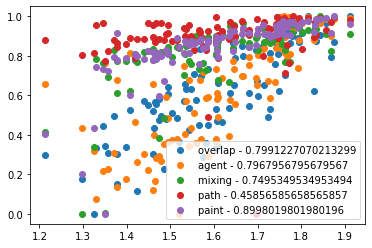

In [4]:
x_axis = [np.mean(r) for r in all_delay_results]
for measure_name, res in all_measure_results.items():
    y_res = np.array([np.mean(r) for r in res])
    y_res -= y_res.min()
    y_res /= y_res.max()
    cor = spearmanr(x_axis, y_res).correlation
    plt.scatter(x_axis, y_res, label=f"{measure_name} - {cor}")
plt.legend()
plt.show()

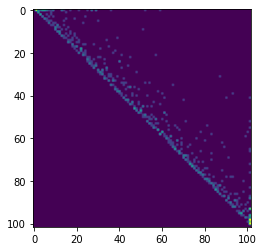

In [5]:
net.plot_matrix()